## Final project: Data Manipulation Essentials 

Спочатку імпортуємо всі необхідні бібліотеки, які будуть використовуватися в подальшому проєкті:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

Тепер зчитаємо всі файли, які будуть використовуватися та присвоїмо їм назви:

In [2]:
df_buildings = pd.read_csv('buildings.csv')
buildings_price = pd.read_csv('50_buildings_prices_monthly_history.csv')
building_mrtg_data = pd.read_csv('building_mortgage_monthly_history.csv')
buildings_queues = pd.read_csv('buildings_queues_monthly_history.csv')
buildings_section = pd.read_csv('section_monthly_history.csv')

Проаналізувавши всі 5 датасетів, я вирішила розділити надані пропозиції на дві категорії: 
- будівлі, які придатні для проживання та скорішого заселення
- будівлі, які купляються з метою отримання нерухомості з будь яким станом

In [3]:
# Фільтруємо наш датасет, де результатом є вибірка всіх buildings, які придатні до проживання прям зараз
building_for_living = df_buildings.loc[
    (df_buildings['developer_offer'] == 'available') &
    (df_buildings['state'] == 'built') &
    (df_buildings['is_risky'] == 'no')
]
building_for_living

,building_id,name_uk,region,raion,city,district,microdistrict,address_uk,class,latitude,longitude,is_risky,state,developer_offer
19,44,ЖК Чайка,Київська,Бучанський,Чайки,NaN,NaN,"вул. Лобановського, 1-36",4,50.441329,30.287169,no,built,available
116,365,ЖК Янтарний,Одеська,NaN,Ілічанка,NaN,NaN,"вул. Шкільна, 25, 35, 37, вул. Таврійська, 39, 41",1,46.599244,30.801791,no,built,available
141,405,ЖМ Острови,Одеська,NaN,Одеса,Пересипський,селище Котовського,"вул. Марсельська, 29а, 30, 31/1, 31/2, 46/1, 4...",4,46.570892,30.799902,no,built,available
142,406,ЖК Наследие Дерибаса,Одеська,NaN,Одеса,Приморський,Центр,"Військовий узвіз, 13",3,46.486903,30.737255,no,built,available
159,470,ЖК Cascade Plaza,Дніпропетровська,NaN,Дніпро,Соборний,Нагорний,"Катеринославський бульвар, 1",3,48.460741,35.050547,no,built,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,10348,ЖК Good Home,Київська,Бучанський,Буча,NaN,NaN,"вул. Грушевського, 4а",4,50.539143,30.225461,no,built,available
7178,10419,NaN,Київська,Вишгородський,Лебедівка,NaN,NaN,"вул. Шолуденка, 27",0,50.719129,30.541736,no,built,available
7191,10433,КМ Romankiv House,Київська,Обухівський,Романків,NaN,NaN,пров. Лісовий,0,50.238353,30.560064,no,built,available
7205,10447,КМ Calluna Chalet,Івано-Франківська,NaN,Микуличин,NaN,NaN,NaN,0,48.379630,24.653120,no,built,available


In [78]:
# Фільтруємо першу вибірку, таким чином, щоб квартири були не продані, використовуючи мьордж
filtered_data = pd.merge(buildings_price[buildings_price['is_sold'] == 'no'], building_for_living, on='building_id', how='inner')
filtered_data

,month,building_price_id,building_id,room_count,min_area,max_area,price_per_meter,max_price_per_meter,currency,is_sold,...,city,district,microdistrict,address_uk,class,latitude,longitude,is_risky,state,developer_offer
0,2024-05-24,47854,5156,3,80.0,80.0,700,700,interbank,no,...,Крюківщина,NaN,NaN,"вул. Богуславська, 1-6",4,50.370485,30.386894,no,built,available
1,2024-05-24,47853,5156,3,80.0,80.0,700,700,interbank,no,...,Крюківщина,NaN,NaN,"вул. Богуславська, 1-6",4,50.370485,30.386894,no,built,available
2,2024-05-24,47808,5251,3,136.0,136.0,1213,1213,interbank,no,...,Чернівці,NaN,Паркова зона,"вул. Буковинська, 33",4,48.283172,25.946637,no,built,available
3,2024-05-24,47700,8350,3,85.0,100.0,750,750,interbank,no,...,Новомосковськ,NaN,NaN,"вул. Зіни Бєлої, вул. Короленко",4,48.638986,35.249180,no,built,available
4,2024-05-24,47699,8350,2,58.0,75.0,750,750,interbank,no,...,Новомосковськ,NaN,NaN,"вул. Зіни Бєлої, вул. Короленко",4,48.638986,35.249180,no,built,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2024-03-24,28519,5317,2,60.0,70.0,700,700,interbank,no,...,Тернопіль,NaN,Північний,вул. Головацького,4,49.571297,25.626835,no,built,available
4097,2024-03-24,28518,5317,1,45.0,45.0,644,644,interbank,no,...,Тернопіль,NaN,Північний,вул. Головацького,4,49.571297,25.626835,no,built,available
4098,2024-03-24,28366,5887,3,85.0,85.0,820,900,interbank,no,...,Харків,Київський,Піски,"вул. Валентинівська, 15а",2,50.018053,36.326598,no,built,available
4099,2024-03-24,28365,5887,2,73.0,99.0,820,900,interbank,no,...,Харків,Київський,Піски,"вул. Валентинівська, 15а",2,50.018053,36.326598,no,built,available


In [115]:
# Рахауємо кількість таких пропозицій для кожної області
count_per_region = filtered_data.groupby('region').size()
count_per_region

region
Івано-Франківська     123
Волинська              98
Вінницька              55
Дніпропетровська      218
Житомирська            32
Закарпатська          131
Запорізька             36
Київська             1560
Львівська             480
Миколаївська           76
Одеська               434
Полтавська            171
Рівненська            103
Сумська                 8
Тернопільська         188
Харківська             82
Хмельницька           108
Черкаська              59
Чернівецька            82
Чернігівська           57
dtype: int64

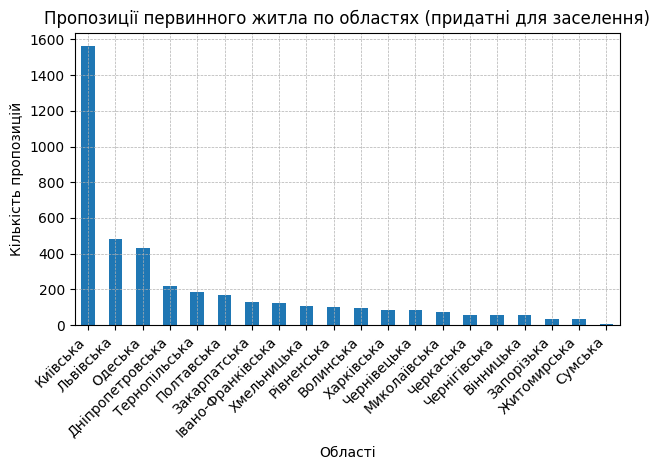

In [80]:
# Створення діаграми, яка демонструє кількість пропозицій на кожну область (квартири придатні до проживання)
region_counts = filtered_data['region'].value_counts()
region_counts.plot(kind='bar')

# Називаємо наш графік та осі
plt.title('Пропозиції первинного житла по областях (придатні для заселення)')
plt.xlabel('Області')
plt.ylabel('Кількість пропозицій')
plt.xticks(rotation=45, ha='right') # змінюємо нахил текстудля зручного читання областей

# Додаємо сітку, встановлюємо довжину та демонструємо графік
plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Тепер наша ціль так само розглянути кількість пропозицій для кожної області, тільки для другої вибірки!
Для цього спочатку я переглядую, які пропозиції залишились, встановлюю фільтри, які підходять під наші вимоги. Наступне з отриманого датасету обираю ці пропозиції, які ще не куплені і підлягають продажу. 

In [7]:
df_buildings['developer_offer'].unique()

array(['all_sold', 'available', 'frozen', 'contact_unavailable',
       'not_started', 'open_reservation', nan], dtype=object)

In [8]:
# Фільтрація інших пропозицій, які залишились
buildings = df_buildings[
    (df_buildings['developer_offer'].isin(['available', 'open_reservation'])) & (df_buildings['is_risky'] == 'no')
]

buildings

,building_id,name_uk,region,raion,city,district,microdistrict,address_uk,class,latitude,longitude,is_risky,state,developer_offer
6,20,ЖК Паркове місто,Київська,NaN,Київ,Подільський,Вітряні Гори,"вул. Вишгородська, 45",2,50.509894,30.448028,no,under_construct,available
12,28,ЖК 4 сезони,Київська,NaN,Київ,Голосіївський,Голосіїв,"вул. Михайла Максимовича (Трутенка), 3г",4,50.390914,30.479942,no,under_construct,available
15,35,ЖК Новопечерські Липки,Київська,NaN,Київ,Печерський,Чорна Гора,"вул. Андрія Верхогляда (Драгомирова), 1-20а",2,50.411473,30.545441,no,under_construct,available
19,44,ЖК Чайка,Київська,Бучанський,Чайки,NaN,NaN,"вул. Лобановського, 1-36",4,50.441329,30.287169,no,built,available
116,365,ЖК Янтарний,Одеська,NaN,Ілічанка,NaN,NaN,"вул. Шкільна, 25, 35, 37, вул. Таврійська, 39, 41",1,46.599244,30.801791,no,built,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,10482,ЖК OXFORD,Київська,Бучанський,Чайки,NaN,NaN,NaN,4,50.432154,30.287323,no,in_design,open_reservation
7240,10484,КМ WOODCOUNTRY,Київська,Фастівський,Путрівка,NaN,NaN,NaN,0,50.212715,30.279460,no,under_construct,available
7241,10485,Таунхауси Oscar Park,Київська,Бучанський,Буча,NaN,NaN,"вул. Гоголя, 11",0,50.556908,30.251091,no,in_design,open_reservation
7242,10486,КМ Garden Park,Київська,Бучанський,Ірпінь,NaN,NaN,"вул. Хмельницького, 26",0,50.525432,30.256386,no,under_construct,open_reservation


In [81]:
# Зменшуємо наш датсет, обираючи тільки не продані житлові будинки
not_sold_buildings = pd.merge(buildings_price[buildings_price['is_sold'] == 'no'], buildings, on='building_id', how='inner')
not_sold_buildings

,month,building_price_id,building_id,room_count,min_area,max_area,price_per_meter,max_price_per_meter,currency,is_sold,...,city,district,microdistrict,address_uk,class,latitude,longitude,is_risky,state,developer_offer
0,2024-05-24,47878,9921,3,64.29,71.07,580,610,interbank,no,...,Святопетрівське,NaN,NaN,бул. Лесі Українки,4,50.389557,30.327390,no,under_construct,available
1,2024-05-24,47877,9921,2,46.02,64.26,570,600,interbank,no,...,Святопетрівське,NaN,NaN,бул. Лесі Українки,4,50.389557,30.327390,no,under_construct,available
2,2024-05-24,47876,9921,1,24.23,50.80,570,650,interbank,no,...,Святопетрівське,NaN,NaN,бул. Лесі Українки,4,50.389557,30.327390,no,under_construct,available
3,2024-05-24,47875,10299,1,35.00,75.00,900,1000,interbank,no,...,Луцьк,NaN,Центр,"вул. Ковельська, 40",2,50.744699,25.308129,no,preparatory_work,available
4,2024-05-24,47874,10299,1,35.00,75.00,900,1000,interbank,no,...,Луцьк,NaN,Центр,"вул. Ковельська, 40",2,50.744699,25.308129,no,preparatory_work,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18807,2024-03-24,28416,5288,2,66.40,71.00,35000,39500,uah,no,...,Луцьк,NaN,Гуща,вул. Конякіна,2,50.773067,25.363898,no,under_construct,available
18808,2024-03-24,28366,5887,3,85.00,85.00,820,900,interbank,no,...,Харків,Київський,Піски,"вул. Валентинівська, 15а",2,50.018053,36.326598,no,built,available
18809,2024-03-24,28365,5887,2,73.00,99.00,820,900,interbank,no,...,Харків,Київський,Піски,"вул. Валентинівська, 15а",2,50.018053,36.326598,no,built,available
18810,2024-03-24,28364,5887,1,45.00,63.00,820,900,interbank,no,...,Харків,Київський,Піски,"вул. Валентинівська, 15а",2,50.018053,36.326598,no,built,available


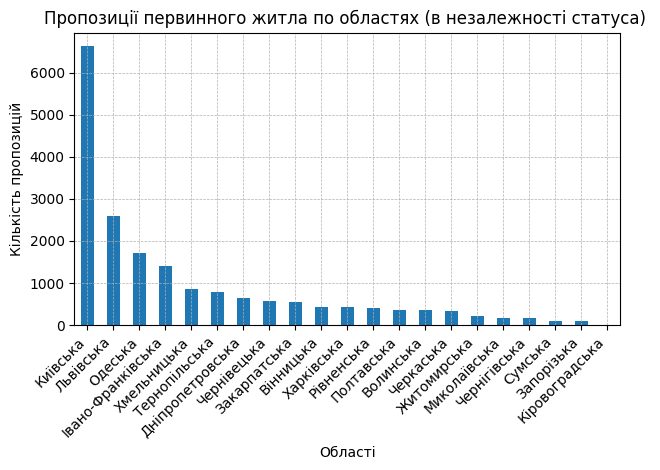

In [10]:
# Наступний крок це перша гістограма, яка показує кількість пропозицій в кожній області
region_counts_1= not_sold_buildings['region'].value_counts()
region_counts_1.plot(kind='bar')

plt.title('Пропозиції первинного житла по областях (в незалежності статуса) ')
plt.xlabel('Області')
plt.ylabel('Кількість пропозицій')
plt.xticks(rotation=45, ha='right')

plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Тепер пропоную порівняти два графіка та подивитись на результати:

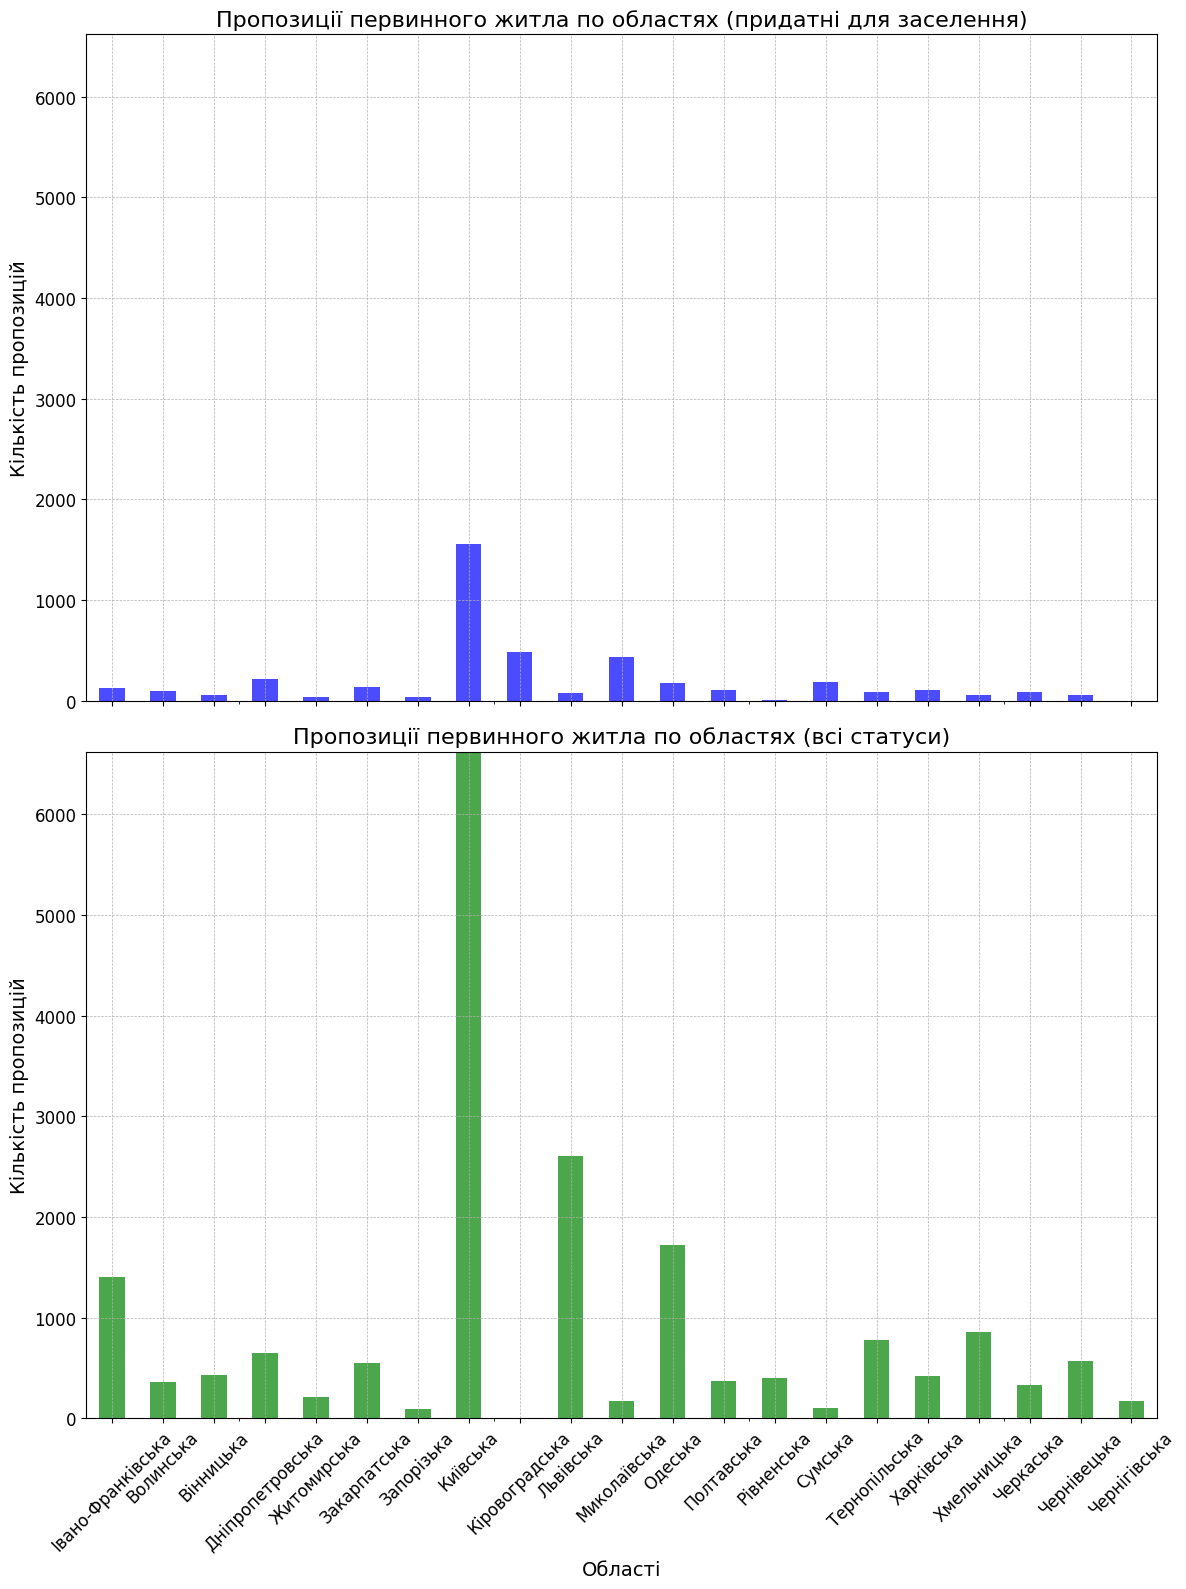

In [11]:
# Сортування даних за областями 
region_counts = filtered_data['region'].value_counts().sort_index()
region_counts_1 = not_sold_buildings['region'].value_counts().sort_index()

# Знаходимо максимальне значення для осі Y
max_y = max(region_counts.max(), region_counts_1.max())

# Налаштування розміру фігури і створення підграфіків з спільною віссю X та Y
fig, axs = plt.subplots(2, 1, figsize=(12, 16), sharex=True, sharey=True)

# Перший підграфік
region_counts.plot(kind='bar', color='b', alpha=0.7, ax=axs[0])
axs[0].set_title('Пропозиції первинного житла по областях (придатні для заселення)', fontsize=16)
axs[0].set_ylabel('Кількість пропозицій', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(linestyle='--', linewidth=0.5)
axs[0].set_ylim(0, max_y)

# Другий підграфік
region_counts_1.plot(kind='bar', color='g', alpha=0.7, ax=axs[1])
axs[1].set_title('Пропозиції первинного житла по областях (всі статуси)', fontsize=16)
axs[1].set_xlabel('Області', fontsize=14)
axs[1].set_ylabel('Кількість пропозицій', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(linestyle='--', linewidth=0.5)
axs[1].set_ylim(0, max_y)

# Налаштування для кращого відображення
plt.tight_layout()
plt.show()



Тепер розглядаємо з іншого боку, а саме середню вартість житла для двох вибірок. Для цього нам потрбіно знайти розрахувати середню вартість кожної адреси, оскільки ми маємо дані про мінімальну та максимальну площу, ціну за метр та максимальну ціну за метр.

Створюємо нову колонку в датасеті building_price, яка має назву ['average_price']. Наступним кроком є зведення до однієї валюти, в нашому випадку - долллари. Розглядаємо для кожної області середню вартість житла та відтворюємо графік.

In [12]:
# Рахуємо середню ціну для кожної адреси
buildings_price['average_area'] = (buildings_price['min_area'] + buildings_price['max_area'])/2
buildings_price['average_price_per_meter'] = (buildings_price['price_per_meter']+buildings_price['max_price_per_meter'])/2
buildings_price['average_price'] = buildings_price['average_area'] * buildings_price['average_price_per_meter'] 

In [13]:
# Уніфікуємо валюту в долари
buildings_price.loc[buildings_price['currency'] == 'uah', 'average_price'] = buildings_price.loc[buildings_price['currency'] == 'uah', 'average_price'] / 40
buildings_price

,month,building_price_id,building_id,room_count,min_area,max_area,price_per_meter,max_price_per_meter,currency,is_sold,average_area,average_price_per_meter,average_price
0,2024-05-24,47878,9921,3,64.29,71.07,580,610,interbank,no,67.680,595.0,40269.6000
1,2024-05-24,47877,9921,2,46.02,64.26,570,600,interbank,no,55.140,585.0,32256.9000
2,2024-05-24,47876,9921,1,24.23,50.80,570,650,interbank,no,37.515,610.0,22884.1500
3,2024-05-24,47875,10299,1,35.00,75.00,900,1000,interbank,no,55.000,950.0,52250.0000
4,2024-05-24,47874,10299,1,35.00,75.00,900,1000,interbank,no,55.000,950.0,52250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-03-24,28359,6038,2,0.00,0.00,0,0,interbank,yes,0.000,0.0,0.0000
49996,2024-03-24,28358,6038,1,47.80,47.80,1000,1000,interbank,no,47.800,1000.0,47800.0000
49997,2024-03-24,28357,6039,3,89.63,89.63,13300,13500,uah,no,89.630,13400.0,30026.0500
49998,2024-03-24,28356,6039,2,58.90,58.90,14200,16000,uah,no,58.900,15100.0,22234.7500


In [14]:
# Гістограма про середня ціна квартири на кожну область
filtered_data_1 = pd.merge(filtered_data, buildings_price, on='building_id', how='inner')
# filtered_data_1.columns

average_prices_1 = filtered_data_1.groupby('region')['average_price'].mean()
average_prices_1

region
Івано-Франківська    38047.918640
Волинська            26524.499376
Вінницька            36891.201047
Дніпропетровська     79615.525053
Житомирська          24788.589069
Закарпатська         99348.106046
Запорізька           25670.206044
Київська             84181.487049
Львівська            77348.330819
Миколаївська         34115.719363
Одеська              59661.946878
Полтавська           52337.494098
Рівненська           42023.402515
Сумська              25025.862069
Тернопільська        34257.531057
Харківська           44564.782430
Хмельницька          25619.409301
Черкаська            36456.317116
Чернівецька          62577.842089
Чернігівська         25003.829167
Name: average_price, dtype: float64

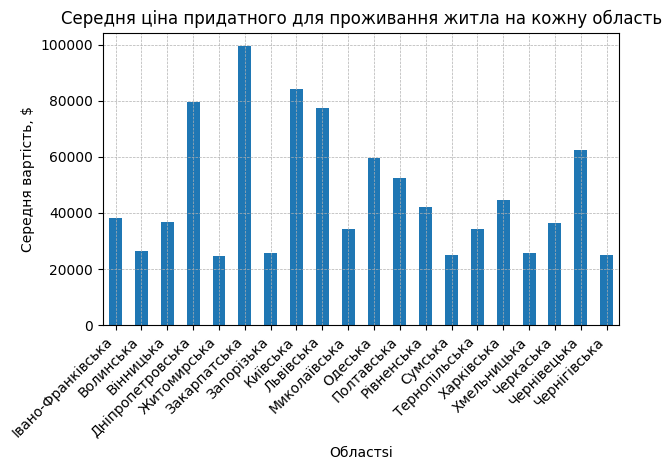

In [82]:
# Гістограма 1
average_prices_1.plot(kind='bar')

plt.title('Середня ціна придатного для проживання житла на кожну область')
plt.xlabel('Областsі')
plt.ylabel('Середня вартість, $')
plt.xticks(rotation=45, ha='right')

plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [16]:
filtered_data_2 = pd.merge(not_sold_buildings, buildings_price, on='building_id', how='inner')

In [17]:
average_prices_2 = filtered_data_2.groupby('region')['average_price'].mean()
average_prices_2

region
Івано-Франківська    42850.228404
Волинська            38427.557251
Вінницька            48750.064102
Дніпропетровська     84343.838508
Житомирська          26022.976208
Закарпатська         85751.661593
Запорізька           36031.936626
Київська             86406.796954
Кіровоградська       50325.000000
Львівська            69558.906001
Миколаївська         34917.918397
Одеська              57323.880311
Полтавська           50380.457103
Рівненська           53730.174350
Сумська              31500.523528
Тернопільська        37962.899909
Харківська           36895.453126
Хмельницька          33608.276743
Черкаська            47727.254925
Чернівецька          57913.570008
Чернігівська         30206.712694
Name: average_price, dtype: float64

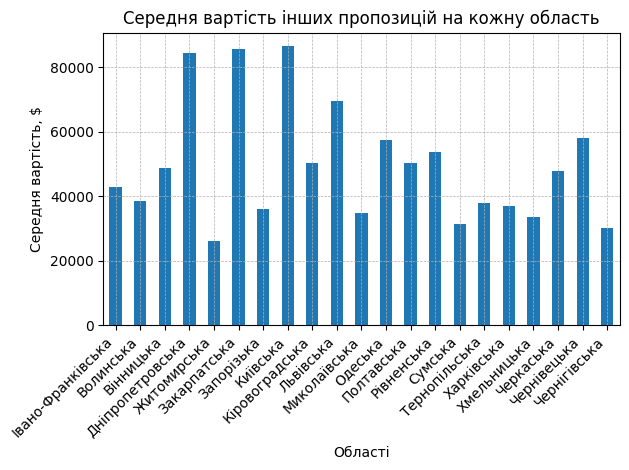

In [84]:
# Діаграма, яка відтворює середню вартість інших пропозицій другої вибірки
average_prices_2.plot(kind='bar')

plt.title('Середня вартість інших пропозицій на кожну область')
plt.xlabel('Області')
plt.ylabel('Середня вартість, $')
plt.xticks(rotation=45, ha='right')

plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Для зручнішого порівняння об'єднуємо два графіка наступним чином:

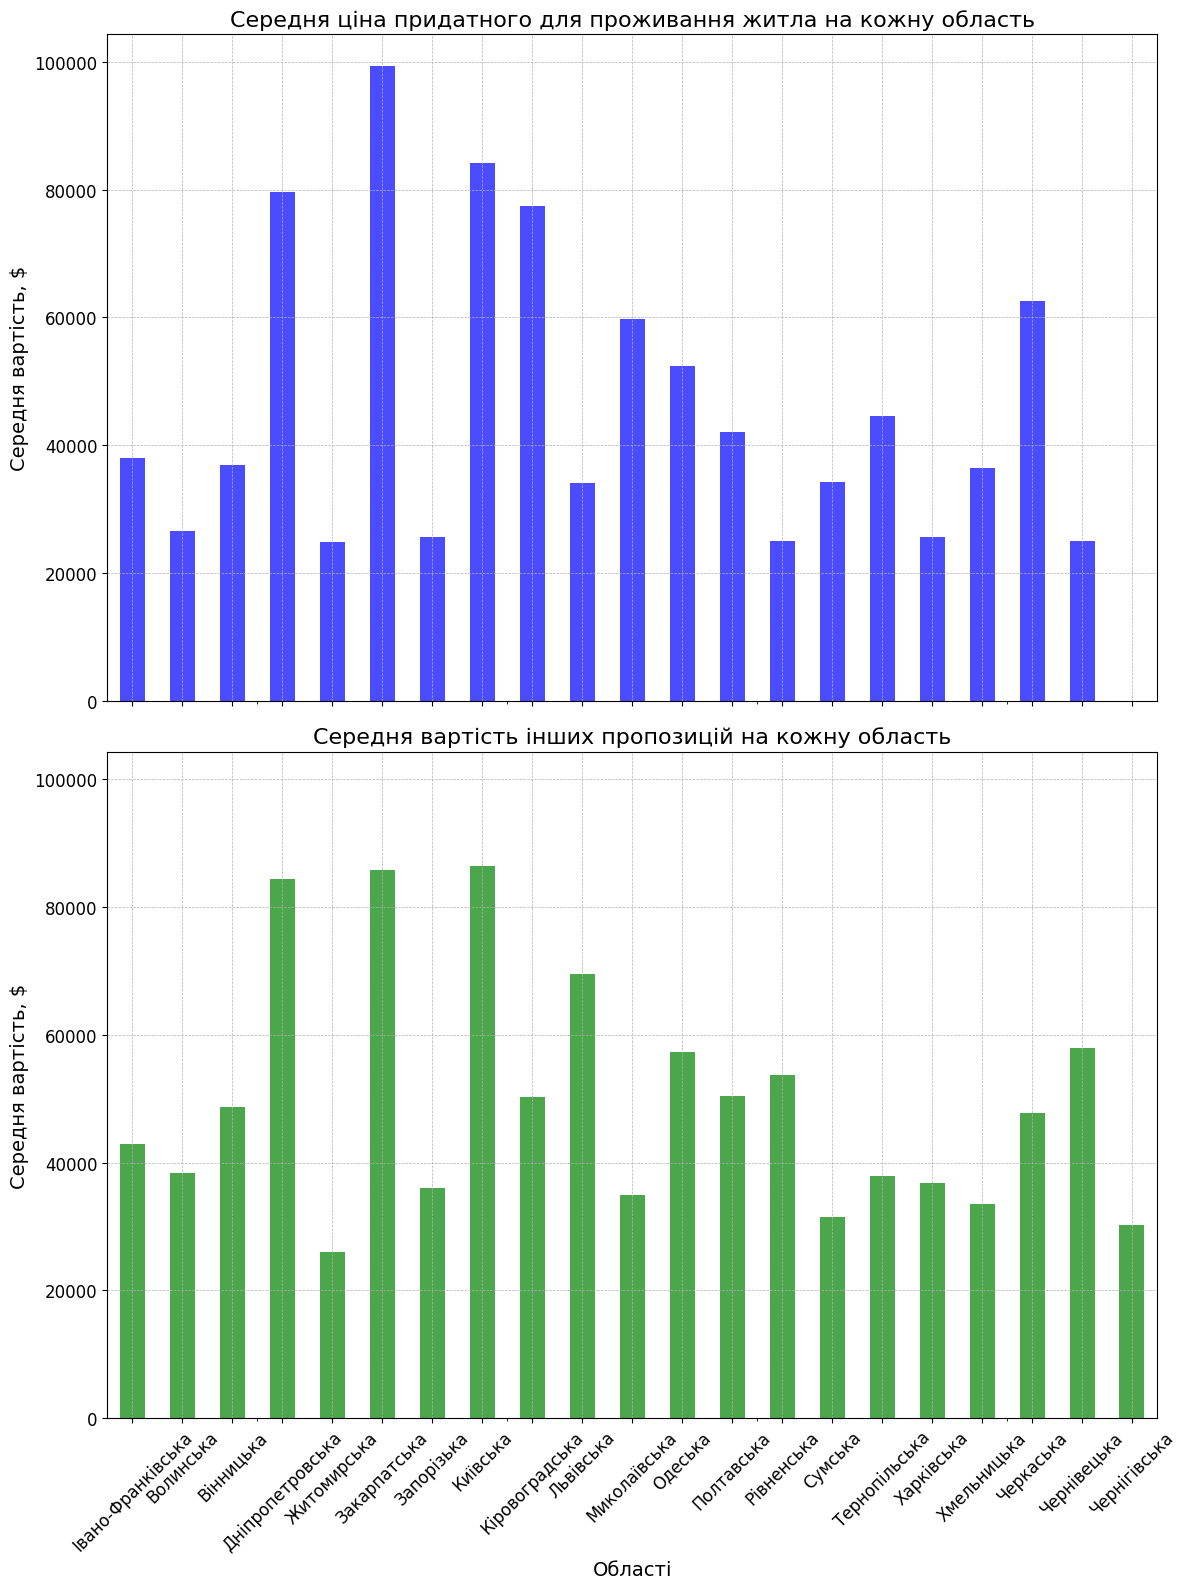

In [85]:
# Сортування даних за областями, щоб вони однаковими
average_prices_1_sorted = average_prices_1.sort_index()
average_prices_2_sorted = average_prices_2.sort_index()

# Налаштування розміру фігури і створення підграфіків
fig, axs = plt.subplots(2, 1, figsize=(12, 16), sharex=True, sharey=True)

# Додаємо перший графік для першої вибірки
average_prices_1_sorted.plot(kind='bar', ax=axs[0], color='b', alpha=0.7)
axs[0].set_title('Середня ціна придатного для проживання житла на кожну область', fontsize=16)
axs[0].set_ylabel('Середня вартість, $', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(linestyle='--', linewidth=0.5)

# Додаємо другий підграфік другої вибірки
average_prices_2_sorted.plot(kind='bar', ax=axs[1], color='g', alpha=0.7)
axs[1].set_title('Середня вартість інших пропозицій на кожну область', fontsize=16)
axs[1].set_xlabel('Області', fontsize=14)
axs[1].set_ylabel('Середня вартість, $', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(linestyle='--', linewidth=0.5)

# Налаштування для кращого відображення так демонстрація
plt.tight_layout()
plt.show()


До цього ми розглядали в загальному варість житла та кількість пропозицій для всіх областей. На разі пропоную розглянути всі міста для кожної області окремо використовуючи графік вигляду faceted scatter plot

In [20]:
# Об'єднуємо два датафрейми
merged_df_1 = pd.merge(buildings_price, filtered_data_1, on='building_id', how='inner')
merged_df_1.columns

Index(['month', 'building_price_id', 'building_id', 'room_count', 'min_area',
       'max_area', 'price_per_meter', 'max_price_per_meter', 'currency',
       'is_sold', 'average_area_x', 'average_price_per_meter_x',
       'average_price_x', 'month_x', 'building_price_id_x', 'room_count_x',
       'min_area_x', 'max_area_x', 'price_per_meter_x',
       'max_price_per_meter_x', 'currency_x', 'is_sold_x', 'name_uk', 'region',
       'raion', 'city', 'district', 'microdistrict', 'address_uk', 'class',
       'latitude', 'longitude', 'is_risky', 'state', 'developer_offer',
       'month_y', 'building_price_id_y', 'room_count_y', 'min_area_y',
       'max_area_y', 'price_per_meter_y', 'max_price_per_meter_y',
       'currency_y', 'is_sold_y', 'average_area_y',
       'average_price_per_meter_y', 'average_price_y'],
      dtype='object')

In [21]:
# окей тепер потрібно надати статистику по містам
# Підраховаємо кількість пропозицій для кожного міста
city_counts = merged_df_1['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
city_counts

,city,count
0,Софіївська Борщагівка,1805610
1,Київ,671007
2,Ірпінь,375868
3,Львів,281783
4,Одеса,188501
...,...,...
122,Гнатівка,27
123,Пилиповичі,27
124,Рованці,27
125,Броди,27


In [22]:
# Підраховауємо середню вартість квартир для кожного міста
city_average_price = merged_df_1.groupby('city')['average_price_x'].mean().reset_index()
city_average_price.columns = ['city', 'average_city_price']
city_average_price

,city,average_city_price
0,Івано-Франківськ,34836.208364
1,Ілічанка,6211.153846
2,Ірпінь,53324.967130
3,Байківці,24808.611111
4,Бармаки,36450.000000
...,...,...
122,Чутове,19568.587500
123,Шевченкове,20040.000000
124,Щасливе,44811.107143
125,Щербані,21600.000000


In [88]:
# Об'єднуємо всі дані в один датафрейм для зручного викоритання
city_df = pd.merge(city_counts, city_average_price, on='city')
city_df

,city,count,average_city_price
0,Софіївська Борщагівка,1805610,100086.053590
1,Київ,671007,105513.307634
2,Ірпінь,375868,53324.967130
3,Львів,281783,88468.304600
4,Одеса,188501,58162.166040
...,...,...,...
122,Гнатівка,27,14181.666667
123,Пилиповичі,27,27000.000000
124,Рованці,27,105227.500000
125,Броди,27,56380.166667


In [91]:
# Отримуємо дані про конретне місто та вкахуємо область, якій воно належить
region_and_city = merged_df_1[['region', 'city']]
data_city_merged = pd.merge(city_df, region_and_city, on='city', how='inner')
data_city = data_city_merged.drop_duplicates().reset_index() # Позбуваємося дуплікатів та встановлюємо індекси

data_city


,index,city,count,average_city_price,region
0,0,Софіївська Борщагівка,1805610,100086.053590,Київська
1,1805610,Київ,671007,105513.307634,Київська
2,2476617,Ірпінь,375868,53324.967130,Київська
3,2852485,Львів,281783,88468.304600,Львівська
4,3134268,Одеса,188501,58162.166040,Одеська
...,...,...,...,...,...
122,4634629,Гнатівка,27,14181.666667,Київська
123,4634656,Пилиповичі,27,27000.000000,Київська
124,4634683,Рованці,27,105227.500000,Волинська
125,4634710,Броди,27,56380.166667,Львівська


In [92]:
# Будуємо faceted scatter plot
alt.Chart(data_city).mark_point().encode(
    x=alt.X('count:Q', title='Кількість пропозицій'),
    y=alt.Y('average_city_price:Q', title='Середня вартість, $'),
    tooltip=['city', 'count', 'average_city_price'],
    facet=alt.Facet('region:N', columns=4)  # Розбиваємо на 4 стовпці
).properties( # налаштовуємо довжину, ширину та назву графіка
    width=150,  
    height=150,  
    title='Статистика по кожному місту (область)'
).configure_axis( # розмір шрифтів 
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)




alt.Chart(...)

Наступні графіки демонструють активність на ринку первинної нерхумості по регіонах під час певного періоду!
Я вирішила створити два графіка, які показують кількість пропозицій з різними статусами для кожної області з двома датами - 2023-04-24 та 2024-04-24. Об'єднуємо їх та порівнюємо різницю)

In [93]:
# Фільтруємо дані за конкретний місяць
data_1 = building_mrtg_data[building_mrtg_data['month']=='2023-04-24']
# Об'єднуємо ці датафрейми для додаткової інформації про статуси
merged_data_1 = pd.merge(data_1, df_buildings, on='building_id')
# Визначаємо кількість пропозицій для кожної області із конкретним статусом
grouped_data_1 = merged_data_1.groupby(['region', 'state']).size().reset_index(name='count')

grouped_data_1

,region,state,count
0,Івано-Франківська,built,169
1,Івано-Франківська,frozen,8
2,Івано-Франківська,in_design,16
3,Івано-Франківська,preparatory_work,4
4,Івано-Франківська,suspended,1
...,...,...,...
93,Чернівецька,under_construct,81
94,Чернігівська,built,24
95,Чернігівська,in_design,3
96,Чернігівська,suspended,6


In [27]:
# Розглядаємо, які статуси в нас є
status_type = grouped_data_1['state'].unique()
status_type

array(['built', 'frozen', 'in_design', 'preparatory_work', 'suspended',
       'under_construct'], dtype=object)

In [95]:
# Створюємо графік з кількістю пропозиції в період 2023-04-24
chart1 = alt.Chart(grouped_data_1).mark_bar().encode(
    x='region:N',
    y='count:Q',
    color='state:N',  # Додаємо кодування кольору за статусом
    tooltip=['region', 'state', 'count']
).properties(
    title='Кількість квартир з конкретними статусами за регіонами',
    width=800,  
    height=400  
)

chart1

alt.Chart(...)

Згодна, поки не дуже зрозуміло, тому створюємо інший графік зперіодом в рік різниці:

In [97]:
# Абсолютна та сама операція, тільки вказуємо іншу дату
data_2 = building_mrtg_data[building_mrtg_data['month']=='2024-04-24']
merged_data_2 = pd.merge(data_2, df_buildings, on='building_id')
grouped_data_2 = merged_data_2.groupby(['region', 'state']).size().reset_index(name='count')
# Отримуємо потрібний датасет
grouped_data_2

,region,state,count
0,Івано-Франківська,built,86
1,Івано-Франківська,frozen,4
2,Івано-Франківська,in_design,30
3,Івано-Франківська,preparatory_work,8
4,Івано-Франківська,suspended,1
...,...,...,...
94,Чернівецька,under_construct,51
95,Чернігівська,built,9
96,Чернігівська,in_design,2
97,Чернігівська,suspended,2


In [99]:
# Створюємо на основі другого датасету графік
chart2 = alt.Chart(grouped_data_2).mark_bar().encode(
    x='region:N',
    y='count:Q',
    color='state:N',  
    tooltip=['region', 'state', 'count']
).properties(
    title='Кількість квартир з конкретними статусами за регіонами',
    width=800,  
    height=400  
)

chart2

alt.Chart(...)

Тепер давайте порівняємо, що в нас вишло, для цього об'єднуємо два графіки, зберігаючи один  і тот самий маштаб та додаємо інтерактивності, щоб було зручно продивлятися тонкі деталі)

In [100]:
combined_chart = alt.vconcat(chart1, chart2)
combined_chart.interactive()

alt.VConcatChart(...)

Тепер дослідимо зміну у цінах на нерухомість, обмежуючись Київською областю. Для цього фільтруємо наш датасет, таким чином, щоб область була Київською та середня ціна для кожної адреси не дорівнювала 0.

Зверніть увагу! До цього я вже працювала з датасетом buildings_price, де порахувала середню вартість для кожної адреси. Тож знаходимо середню вартіть за три місяці та зоображаємо)

In [102]:
# Всього три місяці
buildings_price['month'].unique()

array(['2024-05-24', '2024-04-24', '2024-03-24'], dtype=object)

In [104]:
#  Вільтруємо та обробляємо датафрейм, як нам потрібно
whole_data_price = pd.merge(df_buildings, buildings_price, on='building_id', how='inner')
kyiv_region_price = whole_data_price[whole_data_price['region']=='Київська']

kyiv_region_price = kyiv_region_price[kyiv_region_price['average_price']!=0.0000]

In [106]:
# Визначаємо середню вартість за кожен місяць
avg_price_by_month = kyiv_region_price.groupby('month')['average_price'].mean().reset_index()


In [110]:
# Створюю стовпасту діаграму, для того що чітко показати три вартості
bar_chart = alt.Chart(avg_price_by_month).mark_bar(size=10).encode(  # Збільшуємо ширину стовпців
    x='month:T',  # Припускаємо, що 'month' відформатовано як дата (datetime)
    y='average_price:Q',
    tooltip=[
        'month:T',
        'average_price:Q']
).properties(
    title='Середня ціна на нерухомість у Київській області по місяцях'
)

# Створюємо лінійний графік, який проходить через вершини стовпчастого графіку 
line_chart = alt.Chart(avg_price_by_month).mark_line(color='red').encode(
    x='month:T',
    y='average_price:Q'
)



In [112]:
# Накладаємо один на одного
alt.layer(bar_chart, line_chart).properties(
    title='Середня ціна на нерухомість у Київській області по місяцях'
)



alt.LayerChart(...)

Останній крок, ілюструємо "Розпроданість" об'єктів для Київської області. Для цього знаходимо кількість проданих пропозицій за місяць та відображаємо на графіку.

In [113]:
# Обяисл.ємо кількість продажів за три місяці
sold_count_by_month = kyiv_region_price.groupby('month').size().reset_index(name='count')
sold_count_by_month

,month,count
0,2024-03-24,2313
1,2024-04-24,2715
2,2024-05-24,2749


In [114]:
# Зображаємо це
alt.Chart(sold_count_by_month).mark_bar(size=10).encode(
    x='month:T',  # Припускаємо, що 'month' відформатовано як дата (datetime)
    y='count:Q',
    tooltip=['month:T', 'count:Q']
).properties(
    title="Кількість проданих об'єктів у Київській області по місяцях"
)



alt.Chart(...)